<a href="https://colab.research.google.com/github/github-ashwin/DeepLearning-Lab/blob/main/BiRNN_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Bidirectional,SimpleRNN
import matplotlib.pyplot as plt

In [9]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

In [11]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
y_train.shape

(60000, 10)

In [15]:
model = Sequential()

model.add(Bidirectional(SimpleRNN(128,input_shape=(28,28))))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.8573 - loss: 0.4646 - val_accuracy: 0.9330 - val_loss: 0.2095
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.9496 - loss: 0.1658 - val_accuracy: 0.9438 - val_loss: 0.1828
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9594 - loss: 0.1335 - val_accuracy: 0.9575 - val_loss: 0.1368
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9628 - loss: 0.1211 - val_accuracy: 0.9588 - val_loss: 0.1349
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9636 - loss: 0.1197 - val_accuracy: 0.9712 - val_loss: 0.1013
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9669 - loss: 0.1083 - val_accuracy: 0.9651 - val_loss: 0.1248
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9683 - loss: 0.1062 - val_accuracy: 0.9692 - val_loss: 0.1013
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9687 -

In [23]:
test_acc,test_loss = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9584 - loss: 0.1422


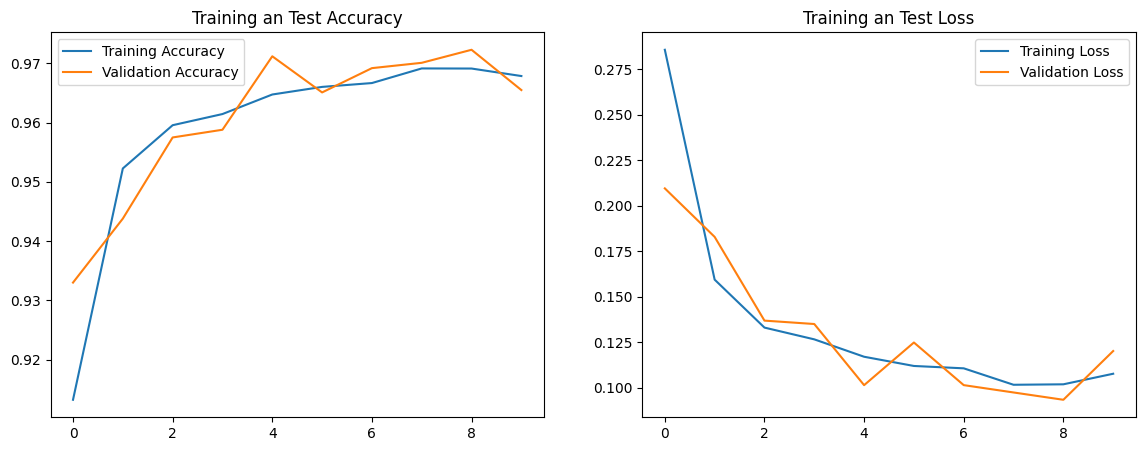

In [24]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.title("Training an Test Accuracy")
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.title("Training an Test Loss")
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()